# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/video_games_sales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn import model_selection, metrics, linear_model

In [3]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
Rank              55792 non-null int64
Name              55792 non-null object
basename          55792 non-null object
Genre             55792 non-null object
ESRB_Rating       23623 non-null object
Platform          55792 non-null object
Publisher         55792 non-null object
Developer         55775 non-null object
VGChartz_Score    0 non-null float64
Critic_Score      6536 non-null float64
User_Score        335 non-null float64
Total_Shipped     1827 non-null float64
Global_Sales      19415 non-null float64
NA_Sales          12964 non-null float64
PAL_Sales         13189 non-null float64
JP_Sales          7043 non-null float64
Other_Sales       15522 non-null float64
Year              54813 non-null float64
Last_Update       9186 non-null object
url               55792 non-null object
status            55792 non-null int64
Vgchartzscore     799 non-null float64
img_url       

In [6]:
df.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,55792.000000,0.0,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,799.000000
mean,27896.500000,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,7.425907
std,16105.907446,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,1.384226
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13948.750000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.800000
50%,27896.500000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.800000
75%,41844.250000,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55792.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


In [11]:
df.shape

(55792, 23)

## 1.  Как критики относятся к спортивным играм?

In [20]:
print('Mode critic score: ', df['Critic_Score'].mode()[0])
print('Median critic score: ', df['Critic_Score'].median())

Mode critic score:  8.0
Median critic score:  7.5


- H0: в среднем критики положительно отзываются о спортивных играх и оценивают их выше среднего >= 7.5
- H1: средняя удовлетворенность критиков спортивными играми ниже среднего < 7.5

За alpha здесь и далее будем принимать 0.05.

Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.

Тест нужен односторонний, т.к. нас интересует только неравенство в меньшую сторону.

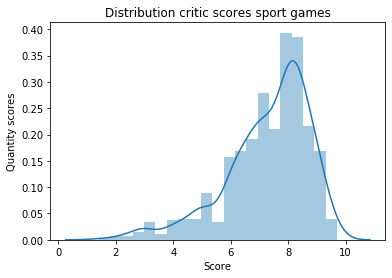

In [27]:
score_sport = df[df.Genre == 'Sports']['Critic_Score'].dropna().values
sns.distplot(score_sport)
plt.xlabel('Score')
plt.ylabel('Quantity scores')
plt.title('Distribution critic scores sport games')
plt.show()

In [24]:
alpha = 0.05
result = stats.ttest_1samp(score_sport, 7.5)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, в среднем критики оценивают спортивные игры ниже, чем остальные')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критики выше среднего оценивают спортивные игры')

Ttest_1sampResult(statistic=-3.719660933773832, pvalue=0.00021577789041608633)
Отвергаем нулевую гипотезу, в среднем критики оценивают спортивные игры ниже, чем остальные


## 2. Критикам нравятся больше игры на PC или на PS4?

In [36]:
PC = df[df.Platform == 'PC']['Critic_Score'].dropna().values
PS4 = df[df.Platform == 'PS4']['Critic_Score'].dropna().values
PC.var(), PS4.var()

(2.0573931103611884, 1.6364009763487921)

- H0: критикам в равной степени нравятся игры на обеих платформах
- H1: критики по разному оценивают игры на двух платформах

Так как будут сравниваться дву выборки значений, в качестве критерия выберем 2-выборочный критерий T-Student с поправкой Уэлча, так как дисперсии у двух выборок разные.

In [39]:
result = stats.ttest_ind(PC, PS4, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по разному относятся к двум площадкам:')
    if result.statistic > 0:
        print('Критики более высоко оценивают игры на PC')
    else:
        print('Критики более высоко оценивают игры на PS4')
else:
    print('Недостаточно оснований, чтобы отвергнуть нулевую гипотезу. Критики одинаково оценивают игры на обеих платформах')

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Отвергаем нулевую гипотезу, критики по разному относятся к двум площадкам:
Критики более высоко оценивают игры на PS4


## 3. Критикам больше нравятся стрелялки или стратегии?

In [40]:
df['Genre'].value_counts()

Misc                9476
Action              7667
Adventure           5293
Sports              5244
Shooter             4586
Role-Playing        4551
Platform            3445
Strategy            3266
Puzzle              3162
Racing              3030
Simulation          2737
Fighting            2085
Action-Adventure     609
Visual Novel         260
Music                195
Party                 75
MMO                   74
Board Game            16
Education             12
Sandbox                9
Name: Genre, dtype: int64

In [41]:
shooter = df[df.Genre == 'Shooter']['Critic_Score'].dropna().values
strategy = df[df.Genre == 'Strategy']['Critic_Score'].dropna().values
shooter.var(), strategy.var()

(2.224441095393084, 1.917408949699253)

Кейс со стороны статистического анализа гипотез полностью аналогичен предыдущему заданию:

- H0: критикам в равной степени нравятся стрелялки и стратегии
- H1: критики по разному оценивают стрелялки и стратегии

Так как будут сравниваться дву выборки значений, в качестве критерия выберем 2-выборочный критерий T-Student с поправкой Уэлча, так как дисперсии у двух выборок разные.

In [42]:
result = stats.ttest_ind(shooter, strategy, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по разному относятся к двум жанрам:')
    if result.statistic > 0:
        print('Критики более высоко оценивают стрелялки')
    else:
        print('Критики более высоко оценивают стратегии')
else:
    print('Недостаточно оснований, чтобы отвергнуть нулевую гипотезу. Критикам одинаково нравятся оба жанра')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Недостаточно оснований, чтобы отвергнуть нулевую гипотезу. Критикам одинаково нравятся оба жанра


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [112]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
data['Message'] = [mes.lower() for mes in data['Message']] #приводим к нижнему регистру
data['Message'] = [re.sub(r'[\W_]+', ' ', mes) for mes in data['Message']] #убираем мусорные символы

In [114]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
stopword_set = set(stopwords.words('english')) #создадим сет со всеми английскими стоп-словами
data['Message'] = [mes.split(' ') for mes in data['Message']] #разделим каждое сообщение на слова
data['Message'] = [[word for word in mes if word not in stopword_set] for mes in data['Message']] #удаляем стоп-слова в сообщениях

In [116]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [117]:
lemmatizer = WordNetLemmatizer() #создаем объект класса лемм
data['Message'] = [[lemmatizer.lemmatize(word) for word in mes] for mes in data['Message']] #приводим слова к нормальной форме

In [118]:
data['Message'] = [' '.join(mes) for mes in data['Message']] #соединим отдельные слова каждого сообщения снова в цельное предложение
#это нужно для корреткной работы TfidfVectorizer()

In [135]:
#Преобразуем все сообщения в вектора TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [158]:
y = np.zeros(len(data))
y[np.where(data.Category == 'spam')] = 1 #заменяем сатегории 'ham' и 'spam' на 0 и 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(tfidf_matrix, 
                                                                    y, 
                                                                    test_size = 0.3,
                                                                    shuffle = True,
                                                                    random_state = 42)

In [163]:
np.random.seed(42)
clf = linear_model.LogisticRegression() #создаем модель
clf.fit(X_train, y_train) #учим
y_pred = clf.predict(X_test)
clf.score(X_test, y_test) #качество

0.958732057416268

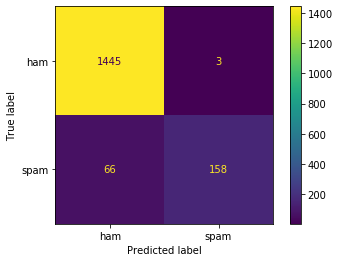

In [172]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam']).plot() #визуализация матрицы неточностей

In [180]:
#датафрейм с ошибочно определенными сообщениями
ind = np.where(y_pred != y_test)[0]
text_mes = data.Message[ind]
true_label = y_test[ind]
pred_label = y_pred[ind]

d = {'text_message': text_mes, 'true_label': true_label, 'predicted_label': pred_label}
wrong_mes = pd.DataFrame(data = d)
wrong_mes

,text_message,true_label,predicted_label
17,eh u remember 2 spell name yes v naughty make ...,0.0,1.0
40,pls go ahead watt wanted sure great weekend ab...,1.0,0.0
47,fair enough anything going,1.0,0.0
74,u call,1.0,0.0
84,yup next stop,1.0,0.0
...,...,...,...
1525,hi ct employee,1.0,0.0
1567,late,1.0,0.0
1569,today accept day u accept brother sister lover...,1.0,0.0
1576,sound gd haha wah u yan jiu fast liao,0.0,1.0


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.
